In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df["Gender"].fillna(df['Gender'].mode()[0],inplace=True)
df["Married"].fillna(df['Married'].mode()[0],inplace=True)
df["Self_Employed"].fillna(df['Self_Employed'].mode()[0],inplace=True)


df["Dependents"].fillna(df['Dependents'].mode()[0],inplace=True)
df["LoanAmount"].fillna(df['LoanAmount'].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df["Credit_History"].fillna(df['Credit_History'].mean(),inplace=True)

df.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Credit_History']=le.fit_transform(df['Credit_History'])

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2,1


In [ ]:
x=df.iloc[:,:-1]
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,2,0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,2,0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,2,2
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,2,2


In [ ]:
y=df.iloc[:,12]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
dt=DecisionTreeClassifier()
dt=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",round(result2*100,2))



Confusion Matrix:
[[10  5]
 [ 6 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.89      0.87      0.88        47

    accuracy                           0.82        62
   macro avg       0.76      0.77      0.76        62
weighted avg       0.83      0.82      0.82        62

Accuracy: 82.26


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
result12 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result12)
result13 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result13)
result14 = accuracy_score(y_test,y_pred)
print("Accuracy:",round(result14*100,2))


Confusion Matrix:
[[ 9  6]
 [ 3 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.88      0.94      0.91        47

    accuracy                           0.85        62
   macro avg       0.81      0.77      0.79        62
weighted avg       0.85      0.85      0.85        62

Accuracy: 85.48


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)*100.2
print("Accuracy:",result2)



Confusion Matrix:
[[ 9  6]
 [ 1 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.88      0.98      0.93        47

    accuracy                           0.89        62
   macro avg       0.89      0.79      0.82        62
weighted avg       0.89      0.89      0.88        62

Accuracy: 88.88709677419355


Loan_Status    0    1
Gender               
0             37   75
1            155  347


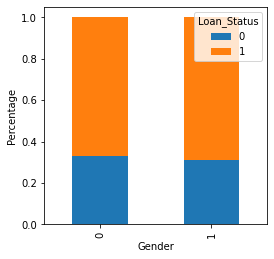

In [ ]:
print(pd.crosstab(df["Gender"],df["Loan_Status"]))

Gender = pd.crosstab(df["Gender"],df["Loan_Status"])

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4 ,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()


Loan_Status    0    1
Married              
0             79  134
1            113  288


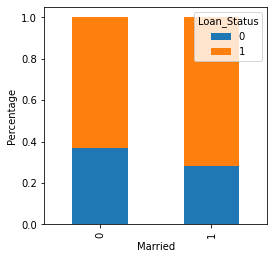

In [ ]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize= (4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()


Loan_Status      0    1
Self_Employed          
0              166  366
1               26   56


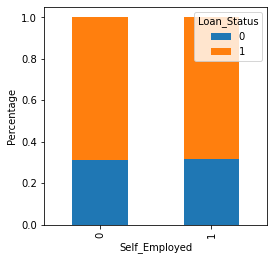

In [ ]:
print(pd.crosstab(df["Self_Employed"],df["Loan_Status"]))
SelfEmployed = pd.crosstab(df["Self_Employed"],df["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()




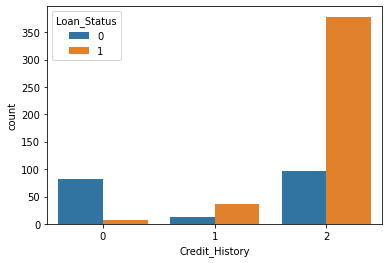

In [ ]:
sns.countplot(x ='Credit_History', hue = "Loan_Status", data = df)
plt.show()

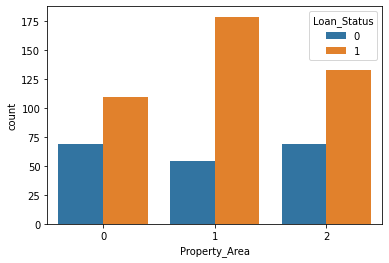

In [ ]:
sns.countplot(x ='Property_Area', hue = "Loan_Status", data = df)
plt.show()



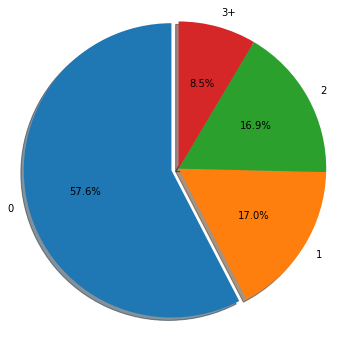

In [ ]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]
plt.pie(size, explode=explode, labels=labels,autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()



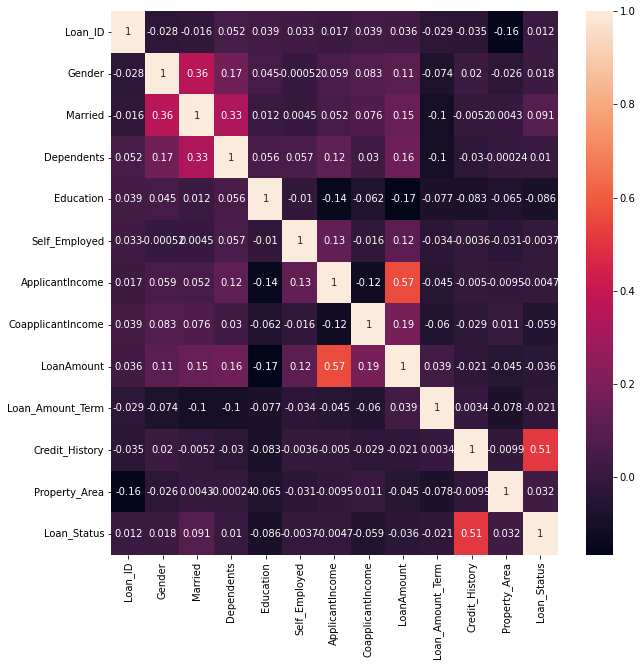

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()
